In [294]:
from bs4 import BeautifulSoup
from pandas import DataFrame
import os
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def extract_data_from_report3(filename):
    html_report_part1 = open(filename,'r',encoding="utf8",errors='ignore')
    soup = BeautifulSoup( html_report_part1, "html.parser")
    return soup

In [10]:
def GetInfo(htmFile):
    dic = {"Title":"","Keywords":"","APIName":"","Description":"","Namespace":"","Guid":""}
    sup = extract_data_from_report3(htmFile)
    title = sup.title.string.split()[0]
    dic["Title"] = title
    for tag in sup.find_all("meta"):
        name = tag.get("name")
        if(name=="Description"):
            Description = tag.get("content")
            dic["Description"] = Description
        if(name=="System.Keywords"):
            Keywords = tag.get("content")
            dic["Keywords"] = Keywords
        if(name=="Microsoft.Help.F1" or name=="Microsoft.Help.Id"):
            APIName  = tag.get("content")
            sp = APIName.split(".")
            if(dic["Keywords"].endswith("property") and len(sp)>1): 
                sp[-1] = title
                sk = ".".join(sp)
                dic["APIName"] = sk
            else: dic["APIName"] = APIName
        if(name=="guid"): 
            Guid = tag.get("content")
            dic["Guid"] = Guid
        if(name=="container"):
            Namespace = tag.get("content")
            dic["Namespace"] = Namespace
    return list(dic.values())
# GetInfo(r"C:\Users\vcho\3D Objects\revitapidoc\0c10ad1b-9de1-baab-d019-99e022688a33.htm")

In [11]:
 # input folder containt all file htm extracted from file chm guide
folder = r"C:\Users\Chuong.Ho\3D Objects\RevitAPIGen\Data2023"

datas = []
def ReadFilesFolder(folder):
    files = []
    for file in os.listdir(folder):
        if file.endswith(".htm"):
            filePath = os.path.join(folder, file)
            files.append(filePath)
            try:
                metadata = GetInfo(filePath)
                datas.append(metadata)
            except Exception as e:
                print(e)
                continue
    return files
results = ReadFilesFolder(folder)
    

In [12]:

header = ["Title","Keywords","APIName","Description","Namespace","Guid"]
df = DataFrame(datas,columns=header,dtype=str)
df = df.dropna()
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109


In [13]:
#add a column to indicate the type of API
df["Type"] = df["Keywords"].str.split(" ").str[-1]

In [14]:
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


In [15]:
print(df.shape)
print(df.count())

(29545, 7)
Title          29545
Keywords       29545
APIName        29545
Description    29545
Namespace      29545
Guid           29545
Type           29545
dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29545 entries, 0 to 29544
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        29545 non-null  object
 1   Keywords     29545 non-null  object
 2   APIName      29545 non-null  object
 3   Description  29545 non-null  object
 4   Namespace    29545 non-null  object
 5   Guid         29545 non-null  object
 6   Type         29545 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df.describe()

In [18]:
#save dataframe to json file
df.to_json("RevitAPI2023.json",orient='records',indent=4)

In [19]:
df.to_csv("RevitAPI2023.csv",index=False, encoding='utf-8')

In [87]:
#read json to dataframe
import json
with open('RevitAPI2023.json') as f:
    data = json.load(f)
df = DataFrame(data)
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


In [88]:
# read csvs to dataframe
df = pd.read_csv("RevitAPI2023.csv")
df.head(10)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,NaN,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,NaN
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property
5,Kip,SymbolTypeId.Kip property,P:Autodesk.Revit.DB.SymbolTypeId.Kip,"Symbol kip, indicating unit Kips.",Autodesk.Revit.DB,00095a9c-e1f8-8edf-ff9b-dbb512951943,property
6,ForceVector3,AreaLoad.ForceVector3 property,P:Autodesk.Revit.DB.Structure.AreaLoad.ForceVe...,The force vector applied to the 3rd reference ...,Autodesk.Revit.DB.Structure,000a344f-d68f-8718-c6e5-72edef5ce04c,property
7,DocumentReloadedLatestEventArgs,"DocumentReloadedLatestEventArgs class, methods",Methods.T:Autodesk.Revit.DB.Events.DocumentRel...,NaN,Autodesk.Revit.DB.Events,000adeb1-4940-aa8c-5e26-df3a44af1bdd,methods
8,NPerMmSup2,SymbolTypeId.NPerMmSup2 property,P:Autodesk.Revit.DB.SymbolTypeId.NPerMmSup2,"Symbol N/mmÂ², indicating unit Newtons per squ...",Autodesk.Revit.DB,000ea288-c477-86a8-57e0-764f2e359d5b,property
9,RevitLink,ExternalResourceTypes.BuiltInExternalResourceT...,P:Autodesk.Revit.DB.ExternalResourceTypes.Buil...,An external resource type representing Revit L...,Autodesk.Revit.DB,0010ac27-ce75-aae5-af64-0f58a6411109,property


#### Check see how many Type use and value count

In [89]:
sr = df["Type"].value_counts()
type(sr)

pandas.core.series.Series

<AxesSubplot:>

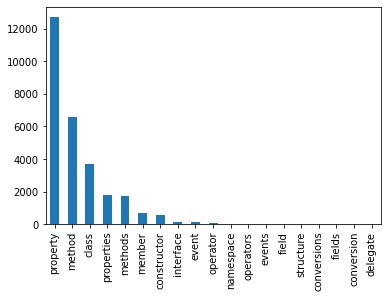

In [90]:
sr.plot(kind="bar")

# Compare Database

In [1]:
#read json to dataframe
import json
from pandas import DataFrame
with open('RevitAPI2022.json') as f:
    data = json.load(f)
df2022 = DataFrame(data)
df2022 = df2022.dropna()
df2022.head(5)
sr2022 = df2022["Type"].value_counts()
with open('RevitAPI2023.json') as f:
    data = json.load(f)
df2023 = DataFrame(data)
df2023 = df2023.dropna()
df2023.head(5)
sr2023 = df2023["Type"].value_counts()



### What is new in Revit 2023

In [7]:
merged = df2023.merge(df2022, on=["APIName"])
result = df2023[~df2023.APIName.isin(merged.APIName)]
result = result.sort_values(by='Title', ascending=True)
result

,Title,Keywords,APIName,Description,Namespace,Guid,Type
5615,AXMImportOptions,Autodesk.Revit.DB.AXMImportOptions class,AllMembers.T:Autodesk.Revit.DB.AXMImportOptions,,Autodesk.Revit.DB,2fb99e4d-2ec0-15d3-aca0-ebe45ab0c574,class
12100,AXMImportOptions,"AXMImportOptions class, methods",Methods.T:Autodesk.Revit.DB.AXMImportOptions,,Autodesk.Revit.DB,6815f9ce-c652-00a9-a962-c7371f37d06e,methods
28850,AXMImportOptions,"AXMImportOptions class, about AXMImportOptions...",T:Autodesk.Revit.DB.AXMImportOptions,The import options used to import AXM format f...,Autodesk.Revit.DB,fa5c85e0-25ea-cc04-2b97-48a3fa989cfc,class
2232,AXMImportOptions,,M:Autodesk.Revit.DB.AXMImportOptions.#ctor(Aut...,Constructs a new instance of AXMImportOptions ...,Autodesk.Revit.DB,12d27723-6ae2-5dd8-af14-dce4ac1c552e,
14907,AXMImportOptions,AXMImportOptions.AXMImportOptions constructor,Overload:Autodesk.Revit.DB.AXMImportOptions.#ctor,,Autodesk.Revit.DB,813358c8-e87c-51f5-4c84-24f1cdebb077,constructor
...,...,...,...,...,...,...,...
9313,ZoneElementDomainData,"ZoneElementDomainData class, about ZoneElement...",T:Autodesk.Revit.DB.Mechanical.ZoneElementDoma...,A base class for specific domain requirements ...,Autodesk.Revit.DB.Mechanical,4fd427fa-088d-0fd9-4046-2f8f82f8b1e2,class
9071,ZoneElementDomainData,Autodesk.Revit.DB.Mechanical.ZoneElementDomain...,AllMembers.T:Autodesk.Revit.DB.Mechanical.Zone...,,Autodesk.Revit.DB.Mechanical,4dd1de6c-7bdf-acf0-e6fb-820bd9e66b5d,class
23626,ZoneExistsNotEnclosedRoom,BuiltInFailures.ZoneFailures.ZoneExistsNotEncl...,P:Autodesk.Revit.DB.BuiltInFailures.ZoneFailur...,Zone has a room not enclosed.,Autodesk.Revit.DB,cd8f390c-ddac-8823-4fd0-a3850b735e4e,property
7861,ZoneNotEnclosed,BuiltInFailures.ZoneFailures.ZoneNotEnclosed p...,P:Autodesk.Revit.DB.BuiltInFailures.ZoneFailur...,Zone not enclosed totally.,Autodesk.Revit.DB,4380a165-efb0-5f39-0fb9-ab9931b7ff71,property


### Info New In Revit 2023

In [8]:
result.shape

(698, 7)

In [9]:
result["Type"].value_counts()

property       296
method         170
class           82
                48
properties      40
methods         39
member          13
constructor      6
interface        2
event            2
Name: Type, dtype: int64

In [11]:
# save to csv
result.to_csv("RevitAPI2023_WhatIsNew.csv",index=False, encoding='utf-8')

In [242]:
df2022.head(5)

,Title,Keywords,APIName,Description,Namespace,Guid,Type
0,Create,,M:Autodesk.Revit.DB.Point.Create(Autodesk.Revi...,Creates a point at the given coordinates and a...,Autodesk.Revit.DB,000086a5-6616-2780-2fc8-0460ab9a3e5b,
1,BoundaryRestraintRotZ,ParameterTypeId.BoundaryRestraintRotZ property,P:Autodesk.Revit.DB.ParameterTypeId.BoundaryRe...,"""Z Spring Modulus""",Autodesk.Revit.DB,0002e99b-f1c0-0480-514a-c3d9f466b9fd,property
2,MaxRange,ElectricalDemandFactorValue.MaxRange property,P:Autodesk.Revit.DB.Electrical.ElectricalDeman...,The maximum range for this demand factor value...,Autodesk.Revit.DB.Electrical,0003f9f7-1be6-9bcb-212a-d38767d01e10,property
3,ConcreteBendingReinforcement,StructuralAsset.ConcreteBendingReinforcement p...,P:Autodesk.Revit.DB.StructuralAsset.ConcreteBe...,The bending reinforcement of the asset.,Autodesk.Revit.DB,0005810b-32f5-0623-b094-c0c47fb50d32,property
4,StairsZeroDesiredRisers,BuiltInFailures.StairRampFailures.StairsZeroDe...,P:Autodesk.Revit.DB.BuiltInFailures.StairRampF...,The number of desired risers for a staircase c...,Autodesk.Revit.DB,00077047-bcc4-4b8f-8a52-07340ec04412,property


In [243]:

df = df.transpose()

In [244]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)
df

,2022,2023
property,12513,12727
method,6539,6555
class,3645,3705
properties,1768,1799
methods,1671,1699
,1432,1463
member,641,651
constructor,575,578
interface,125,127
event,111,113


In [245]:
df.drop_duplicates(subset=df.columns, keep="last")

,2022,2023
property,12513,12727
method,6539,6555
class,3645,3705
properties,1768,1799
methods,1671,1699
,1432,1463
member,641,651
constructor,575,578
interface,125,127
event,111,113


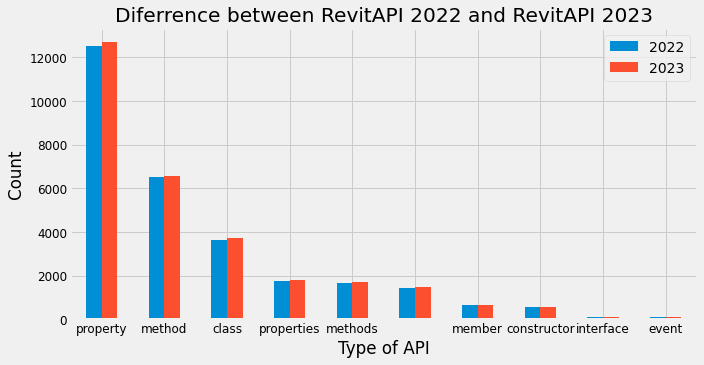

In [248]:
matplotlib.style.use('fivethirtyeight')
df.plot(kind='bar',figsize=(10,5),rot=0,fontsize=12)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.xlabel("Type of API")
plt.ylabel("Count")
plt.show()

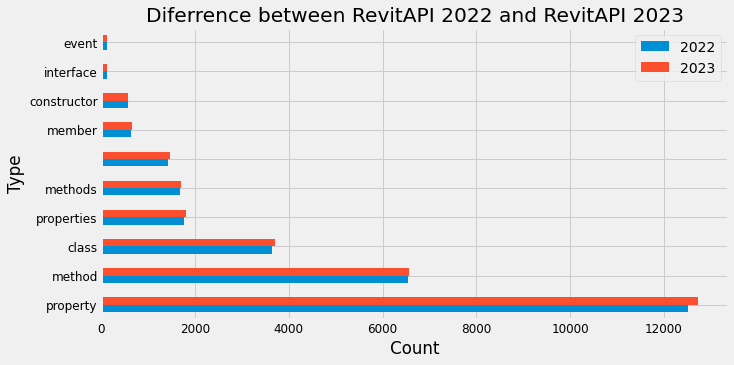

In [276]:
matplotlib.style.use('fivethirtyeight')
df.plot(kind='barh',figsize=(10,5),rot=0,fontsize=12)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.xlabel("Count")
plt.ylabel("Type")
plt.show()

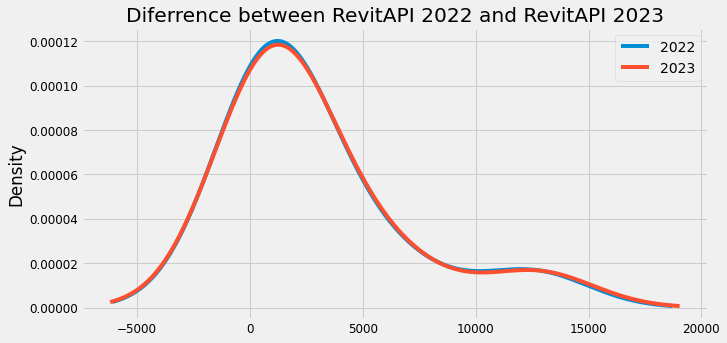

In [278]:
matplotlib.style.use('fivethirtyeight')
df.plot(kind='kde',figsize=(10,5),rot=0,fontsize=12)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.show()

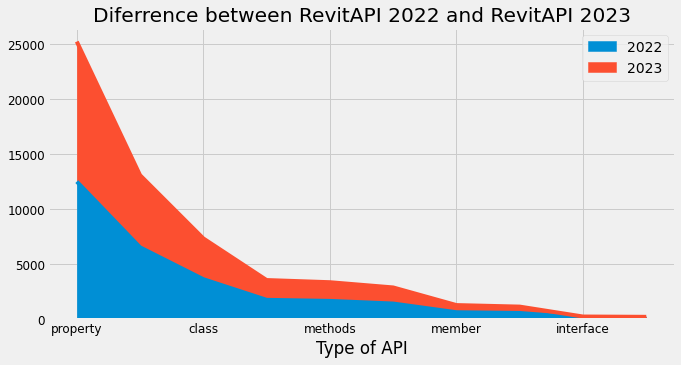

In [272]:
matplotlib.style.use('fivethirtyeight')
df.plot(kind='area',figsize=(10,5),rot=0,fontsize=12)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.xlabel("Type of API")
plt.show()

In [260]:
plt.savefig("result.png")

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, '(%)')

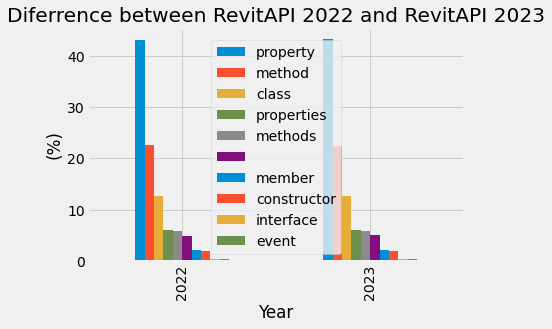

In [253]:
df.transpose().apply(lambda x: x*100/sum(x), axis=1).plot(kind="bar", stacked=False)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.xlabel("Year")
plt.ylabel("(%)")

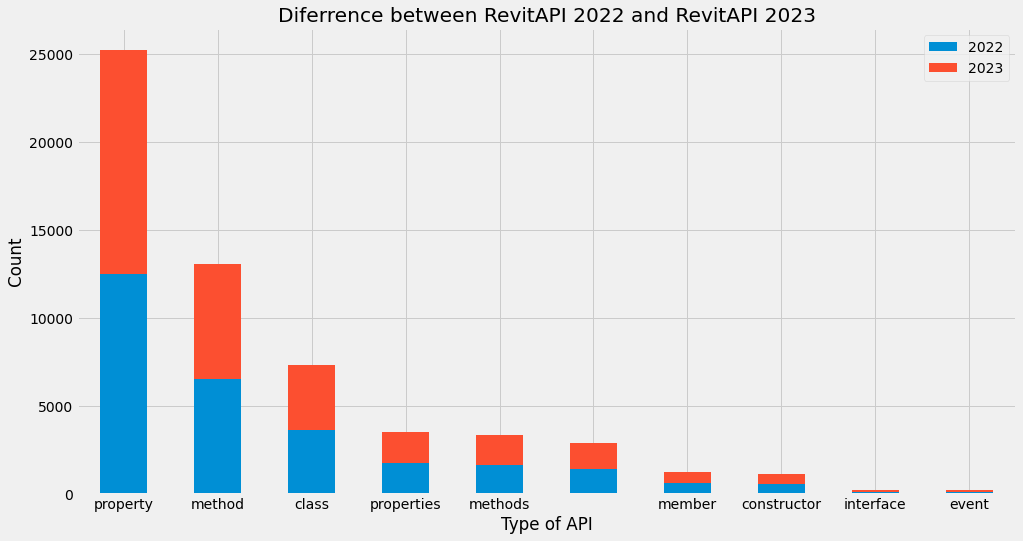

In [258]:
# visualize the data
df.plot(kind='bar',stacked=True,figsize=(15,8),rot=0)
plt.title("Diferrence between RevitAPI 2022 and RevitAPI 2023")
plt.xlabel("Type of API")
plt.ylabel("Count")
plt.show()

In [259]:
# save image to file
plt.close()
plt.savefig("result.png", transparent = True)

<Figure size 432x288 with 0 Axes>